In [1]:
import pandas as pd
from sklearn import datasets, linear_model , ensemble
import numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv("/Users/raghavan/Downloads/Train_UWu5bXk.csv")

In [3]:
def trasform_na_values(x):
    y = x.fillna(x.mean())
    return y    

train['Item_Weight'] = train.groupby("Item_Identifier").Item_Weight.transform(trasform_na_values)

In [4]:
train['store_age'] = abs(train["Outlet_Establishment_Year"] - 2013)

In [100]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,store_age,MRP_Level
0,FDA23,9.800,Low Fat,0.047148,Baking Goods,102.4016,OUT013,1987,High,Tier 3,Supermarket Type1,1720.4272,26,MED
1,FDA36,5.985,Low Fat,0.005662,Baking Goods,186.5924,OUT013,1987,High,Tier 3,Supermarket Type1,2591.2936,26,HIGH
2,FDA47,10.500,Regular,0.116577,Baking Goods,163.1210,OUT013,1987,High,Tier 3,Supermarket Type1,1794.3310,26,HIGH
3,FDB12,11.150,Regular,0.105220,Baking Goods,102.7648,OUT013,1987,High,Tier 3,Supermarket Type1,1142.5128,26,MED
4,FDB36,5.465,Regular,0.048487,Baking Goods,131.2626,OUT013,1987,High,Tier 3,Supermarket Type1,3410.2276,26,MED
5,FDB37,20.250,Regular,0.022922,Baking Goods,240.7538,OUT013,1987,High,Tier 3,Supermarket Type1,3364.9532,26,VERY HIGH
6,FDB60,9.300,Low Fat,0.028498,Baking Goods,195.8136,OUT013,1987,High,Tier 3,Supermarket Type1,2332.9632,26,HIGH
7,FDC37,15.500,Low Fat,0.032846,Baking Goods,106.7938,OUT013,1987,High,Tier 3,Supermarket Type1,3215.8140,26,MED
8,FDF12,8.235,Low Fat,0.082359,Baking Goods,147.6076,OUT013,1987,High,Tier 3,Supermarket Type1,3103.9596,26,HIGH
9,FDG24,7.975,Low Fat,0.014619,Baking Goods,85.2250,OUT013,1987,High,Tier 3,Supermarket Type1,1081.9250,26,MED


In [5]:
def MRP_Level(price):
    if(price < 69) :
        return "LOW"
    elif(price < 136):
        return "MED"
    elif (price < 203):
        return "HIGH"
    else : 
        return "VERY HIGH"
    
train['MRP_Level'] = np.vectorize(MRP_Level)(train["Item_MRP"])

In [6]:
train.columns

Index([u'Item_Identifier', u'Item_Weight', u'Item_Fat_Content',
       u'Item_Visibility', u'Item_Type', u'Item_MRP', u'Outlet_Identifier',
       u'Outlet_Establishment_Year', u'Outlet_Size', u'Outlet_Location_Type',
       u'Outlet_Type', u'Item_Outlet_Sales', u'store_age', u'MRP_Level'],
      dtype='object')

In [7]:
# def trasform_text_na__values(x):
#     if(x.isnull().any().any()):
#         print x.mode()
# #     y = x.fillna(x.mean())
#     return x    

# train['Outlet_Size'] = train.groupby("Outlet_Size").Item_Weight.transform(trasform_text_na__values)
for i in train['Item_Weight']:
    if np.isnan(i):
        print i

nan
nan
nan
nan


In [8]:
filtered_df = train[train.Item_Weight.notnull()]
# train['Item_Weight'] =  train['Item_Weight'].fillna(train['Item_Weight'].mean())
# filtered_df = train
for i in filtered_df['Item_Weight']:
    if np.isnan(i):
        print i

In [9]:
len(train)

8523

In [10]:
print train['Outlet_Size'].describe()
print train['Outlet_Size'].isnull().any().any()
print train['Outlet_Size'].unique()

count      8523
unique        3
top       Small
freq       4798
Name: Outlet_Size, dtype: object
False
['High' 'Medium' 'Small']


In [11]:
filtered_df.Item_Fat_Content[filtered_df.Item_Fat_Content == "low fat"] =  'Low Fat'


/Users/raghavan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/raghavan/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/raghavan/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, sel

In [12]:
Y = filtered_df['Item_Outlet_Sales']

In [13]:
df = pd.concat([filtered_df, pd.get_dummies(filtered_df['Outlet_Type']),pd.get_dummies(filtered_df['Outlet_Location_Type']),
 pd.get_dummies(filtered_df['Outlet_Location_Type']),
 pd.get_dummies(filtered_df['Outlet_Identifier']),
 pd.get_dummies(filtered_df['Outlet_Size']),
 pd.get_dummies(filtered_df['Item_Type']),
 pd.get_dummies(filtered_df['Item_Fat_Content']),
 pd.get_dummies(filtered_df['Item_Identifier']),
 pd.get_dummies(filtered_df['MRP_Level'])], axis=1)
del df['Outlet_Type']
del df['Outlet_Location_Type']
del df['Outlet_Identifier']
del df['Outlet_Size']
del df['Item_Type']
del df['Item_Fat_Content']
del df['Item_Identifier']
del df['Item_Outlet_Sales']
del df['MRP_Level']

In [14]:
set(filtered_df["Item_Fat_Content"].tolist())

{'Low Fat', 'Regular'}

In [15]:
df['FDE52'] = 0
df['FDK57'] = 0
df['FDN52'] = 0
df['FDQ60'] = 0

In [475]:
regr = ensemble.GradientBoostingRegressor(max_depth=10)

In [476]:
regr.fit(df,Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [477]:
regr.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [478]:
# filtered_df[filtered_df["Outlet_Identifier"] == 'OUT010']['Outlet_Size']

In [16]:
test = pd.read_csv("/Users/raghavan/Downloads/Test_u94Q5KV.csv")

In [17]:
test['Item_Weight'] = test.groupby("Item_Identifier").Item_Weight.transform(trasform_na_values)

In [18]:
test['store_age'] = abs(test["Outlet_Establishment_Year"] - 2013)

In [19]:
test['MRP_Level'] = np.vectorize(MRP_Level)(test["Item_MRP"])

In [20]:
set(test.Item_Fat_Content.tolist())

{'LF', 'Low Fat', 'Regular', 'low fat', 'reg'}

In [21]:
test.Item_Fat_Content[test.Item_Fat_Content == "low fat"] =  'Low Fat'
test.Item_Fat_Content[test.Item_Fat_Content == "LF"] =  'Low Fat'
test.Item_Fat_Content[test.Item_Fat_Content == "reg"] =  'Low Fat'

/Users/raghavan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/raghavan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/raghavan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [22]:
test.columns

Index([u'Item_Identifier', u'Item_Weight', u'Item_Fat_Content',
       u'Item_Visibility', u'Item_Type', u'Item_MRP', u'Outlet_Identifier',
       u'Outlet_Establishment_Year', u'Outlet_Size', u'Outlet_Location_Type',
       u'Outlet_Type', u'store_age', u'MRP_Level'],
      dtype='object')

In [23]:
def trasform_na_values_with_total_mean(x):
    y = x.fillna(12.67597597597584)
    return y    
test['Item_Weight'] =  test['Item_Weight'].fillna(test['Item_Weight'].mean())
print test['Item_Weight'].isnull().any().any()
# test['Item_Weight'] = test.groupby("Item_Identifier").Item_Weight.transform(trasform_na_values_with_total_mean)

False


In [24]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,store_age,MRP_Level
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,14,MED
1,FDW14,8.300,Low Fat,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,6,MED
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,15,VERY HIGH
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,6,HIGH
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,28,VERY HIGH
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,16,MED
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,4,LOW
7,FDC48,9.195,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3,28,MED
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,Small,Tier 2,Supermarket Type1,11,MED
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,Small,Tier 2,Supermarket Type1,6,HIGH


In [25]:
test_df = pd.concat([test, pd.get_dummies(test['Outlet_Type']),pd.get_dummies(test['Outlet_Location_Type']),
 pd.get_dummies(test['Outlet_Location_Type']),
 pd.get_dummies(test['Outlet_Identifier']),
 pd.get_dummies(test['Outlet_Size']),
 pd.get_dummies(test['Item_Type']),
 pd.get_dummies(test['Item_Fat_Content']),
 pd.get_dummies(test['Item_Identifier']),
 pd.get_dummies(test['MRP_Level'])], axis=1)
test_df_clone = test_df
del test_df['Outlet_Type']
del test_df['Outlet_Location_Type']
del test_df['Outlet_Identifier']
del test_df['Outlet_Size']
del test_df['Item_Type']
del test_df['Item_Fat_Content']
del test_df['Item_Identifier']
del test_df['MRP_Level']

In [26]:
test_df['DRE49'] = 0
test_df['FDA04'] = 0
test_df['FDG24'] = 0
test_df['FDG33'] = 0
test_df['FDL10'] = 0
test_df['FDL34'] = 0
test_df['FDO19'] = 0
test_df['FDO52'] = 0
test_df['FDT07'] = 0
test_df['FDU19'] = 0
test_df['FDW13'] = 0
test_df['FDX04'] = 0
test_df['FDX20'] = 0
test_df['NCL31'] = 0
test_df['NCQ06'] = 0
test_df['NCY18'] = 0

In [27]:
train_columns = df.columns.tolist()

In [28]:
test_columns

NameError: name 'test_columns' is not defined

In [29]:
test_columns = test_df.columns.tolist()

In [30]:
len(test_columns)

1609

In [31]:
len(set(test_columns))

1606

In [32]:
len(train_columns)

1609

In [33]:
len(set(train_columns))

1606

In [34]:
set(train_columns) - set(test_columns)

set()

In [500]:
predicted_df = regr.predict(test_df)

In [501]:
predicted_df

array([ 1660.74833604,  1439.3217785 ,   569.05272586, ...,  1669.9725735 ,
        3187.29383354,  1292.51007992])

In [35]:
test_df_clone = pd.concat([test, pd.get_dummies(test['Outlet_Type'])], axis=1)
test_df_clone = pd.concat([test, pd.get_dummies(test['Outlet_Location_Type'])], axis=1)
test_df_clone = pd.concat([test, pd.get_dummies(test['Outlet_Identifier'])], axis=1)
test_df_clone = pd.concat([test, pd.get_dummies(test['Outlet_Size'])], axis=1)
test_df_clone = pd.concat([test, pd.get_dummies(test['Item_Type'])], axis=1)
test_df_clone = pd.concat([test, pd.get_dummies(test['Item_Fat_Content'])], axis=1)
test_df_clone = pd.concat([test, pd.get_dummies(test['Item_Identifier'])], axis=1)

In [43]:
predicted_df_1 =  pd.DataFrame(predicted_df)

In [44]:
predicted_df_1['Item_Identifier'] = test_df_clone['Item_Identifier']

In [45]:
predicted_df_1['Outlet_Identifier'] = test_df_clone['Outlet_Identifier']

In [46]:
cols = ['Item_Identifier','Outlet_Identifier',0]

In [48]:
predicted_df_1[cols].to_csv('/Users/raghavan/Downloads/final_gb_new.csv',sep=',',index=False)

In [2]:
import sys
print(sys.version)

2.7.13 |Anaconda custom (64-bit)| (default, Dec 20 2016, 23:05:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [69]:
import xgboost as xgb

In [70]:
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 2

In [37]:
xgtrain = xgb.DMatrix(df.values, Y.values)


In [38]:
newtest_df = xgb.DMatrix(test_df.values)

In [40]:
bst = xgb.XGBRegressor()

In [41]:
bst.fit(df.values, Y.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [42]:
predicted_df = bst.predict(test_df.values)

In [126]:
bst.feature_importances_

array([ 0.00163399,  0.24019608,  0.25653595, ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

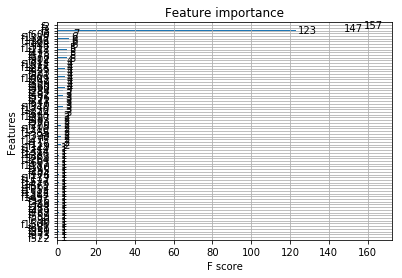

In [133]:
xgb.plot_importance(bst)

In [139]:
import keras

ImportError: No module named keras

In [65]:
final_train = df

In [51]:
final_test = test_df

In [66]:
len(test_df.columns)

1609

In [60]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

In [92]:
model = Sequential()
model.add(Dense(1609, input_dim=1609, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mse', optimizer='adam')
model

In [ ]:
model.fit(final_train.values, Y.values, epochs=100, batch_size=30)

Epoch 1/100
8519/8519 [==============================] - 11s 1ms/step - loss: 1072782.8898
Epoch 2/100
8519/8519 [==============================] - 11s 1ms/step - loss: 1075554.4820
Epoch 3/100
8519/8519 [==============================] - 11s 1ms/step - loss: 1052248.3438
Epoch 4/100
8519/8519 [==============================] - 12s 1ms/step - loss: 1062210.6155
Epoch 5/100
8519/8519 [==============================] - 13s 2ms/step - loss: 1070960.0865: 1
Epoch 6/100
8519/8519 [==============================] - 13s 1ms/step - loss: 1051820.4779
Epoch 7/100
8519/8519 [==============================] - 13s 2ms/step - loss: 1047964.6445
Epoch 8/100
8519/8519 [==============================] - 14s 2ms/step - loss: 1064232.2543
Epoch 9/100
8519/8519 [==============================] - 14s 2ms/step - loss: 1030046.7967: 2s - loss: 103781 - ETA: 1
Epoch 10/100
8519/8519 [==============================] - 13s 2ms/step - loss: 1037449.8838
Epoch 11/100
8519/8519 [==============================] - 

In [83]:
bst.objective()

TypeError: 'str' object is not callable

In [103]:
train.columns.tolist()

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales',
 'store_age',
 'MRP_Level']

In [105]:
train['Outlet_Type'].corr(train["Item_Outlet_Sales"])

TypeError: unsupported operand type(s) for /: 'str' and 'int'